In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix
%matplotlib inline
from scipy.stats import linregress
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import pandas as pd
import os

In [2]:
#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


In [3]:
#Evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

#for warning
from warnings import filterwarnings
filterwarnings("ignore")  ## To remove any kind of warning


In [4]:
df = pd.read_csv("diabetes_best_data.csv")
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [5]:
df.ndim, df.size

(2, 8840)

In [6]:
# Convert all the 'Yes' answers to 1, and all the 'No' answers to 0;
# For 'class' (dependent variable(y)), '1' means diabetic, and '0' means not diabetic.

df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['class'] = df['class'].map({'Positive':"Diabetic",'Negative': "Not Diabetic"})
df['Polyuria'] = df['Polyuria'].map({'Yes':1,'No':0})
df['Polydipsia'] = df['Polydipsia'].map({'Yes':1,'No':0})
df['sudden weight loss'] = df['sudden weight loss'].map({'Yes':1,'No':0})
df['weakness'] = df['weakness'].map({'Yes':1,'No':0})
df['Polyphagia'] = df['Polyphagia'].map({'Yes':1,'No':0})
df['Genital thrush'] = df['Genital thrush'].map({'Yes':1,'No':0})
df['visual blurring'] = df['visual blurring'].map({'Yes':1,'No':0})
df['Itching'] = df['Itching'].map({'Yes':1,'No':0})
df['Irritability'] = df['Irritability'].map({'Yes':1,'No':0})
df['delayed healing'] = df['delayed healing'].map({'Yes':1,'No':0})
df['partial paresis'] = df['partial paresis'].map({'Yes':1,'No':0})
df['muscle stiffness'] = df['muscle stiffness'].map({'Yes':1,'No':0})
df['Alopecia'] = df['Alopecia'].map({'Yes':1,'No':0})
df['Obesity'] = df['Obesity'].map({'Yes':1,'No':0})

In [7]:
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Diabetic
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Diabetic
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Diabetic
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Diabetic
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Diabetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,Diabetic
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,Diabetic
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,Diabetic
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,Not Diabetic


In [8]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

Exploratory Data Analysis (EDA) on Target Variables

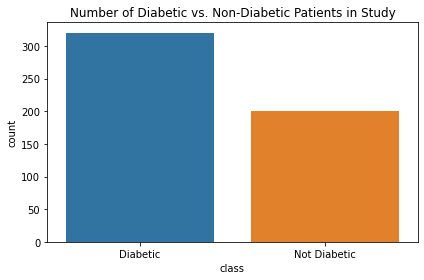

In [9]:
sns.countplot(x="class", data=df)
#pie chart?
plt.title("Number of Diabetic vs. Non-Diabetic Patients in Study")
plt.tight_layout()

In [10]:
df["class"].value_counts()

Diabetic        320
Not Diabetic    200
Name: class, dtype: int64

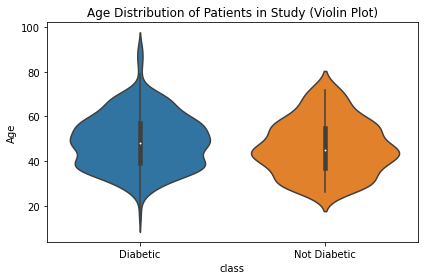

In [11]:
count = df["Age"].nunique()
sns.violinplot( y="Age", data=df, x="class")
# Set title
plt.title("Age Distribution of Patients in Study (Violin Plot)")
plt.tight_layout()


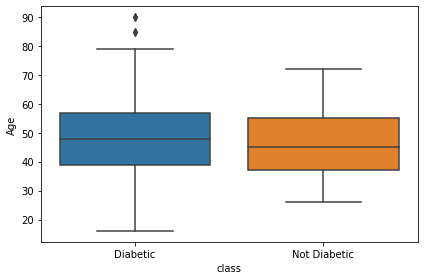

In [12]:
sns.boxplot(x='class',y='Age',data=df)

plt.tight_layout()

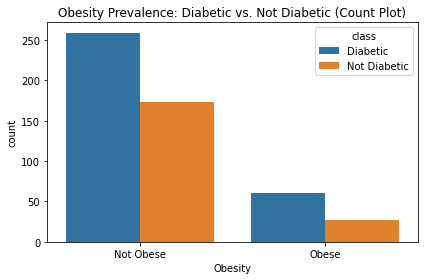

In [13]:
sns.countplot(x="Obesity", data=df, hue='class')
positions = (0,1) 
labels = ("Not Obese", "Obese")
plt.xticks(positions, labels)
plt.title("Obesity Prevalence: Diabetic vs. Not Diabetic (Count Plot)")

plt.tight_layout()


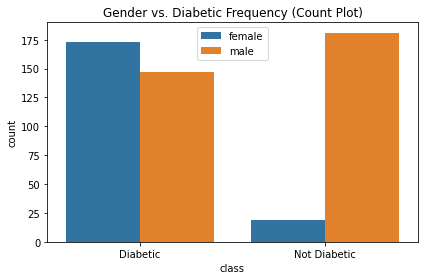

In [14]:

sns.countplot(x='class', data=df, hue="Gender")
positions = (0,1)
labels = ("Diabetic", "Not Diabetic")
plt.xticks(positions, labels)
plt.legend( ["female", "male"])
plt.title("Gender vs. Diabetic Frequency (Count Plot)")
plt.tight_layout()


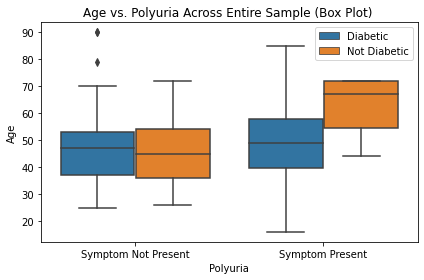

In [15]:
sns.boxplot(y="Age", x="Polyuria", data=df, hue="class")
plt.legend(loc="best")
positions = (0,1)
labels = ("Symptom Not Present", "Symptom Present")
plt.xticks(positions, labels)
plt.title("Age vs. Polyuria Across Entire Sample (Box Plot) ")
plt.tight_layout()


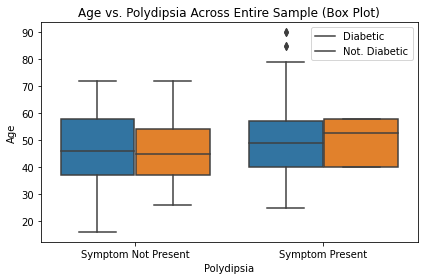

In [16]:
sns.boxplot(y="Age", x="Polydipsia", data=df, hue="class")
plt.legend(loc = "upper left")
plt.title("Age vs. Polydipsia Across Entire Sample (Box Plot)")
positions = (0,1)
labels = ("Symptom Not Present", "Symptom Present")
plt.xticks(positions, labels)
plt.legend(['Diabetic', 'Not. Diabetic'])
plt.tight_layout()

In [17]:
# do another test using gender 

Preprocessing the Data using the Min Max Scaler and Perform some feature selection

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
for classes in "class":
    if classes == 'Postive':
        print("1")
    else:
        print("0")
        

0
0
0
0
0


In [20]:
X = df.drop("class", axis=1)
y= df["class"]
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [22]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)

In [23]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
target = df["class"]
target_names = ["negative", "positive"]

In [25]:
# Create Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train);
## Evaluating the model
log_reg = log_reg.score(X_test,y_test)

In [26]:
# Create a hyperparameter grid for LogisticRegression

log_reg_grid = {"C": np.logspace(0, 4, 20),"solver": ["liblinear"]}
# Tune LogisticRegression
np.random.seed(42)
# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                  param_distributions=log_reg_grid,
                                  cv=5,
                                  n_iter=20,
                                  verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)
score = rs_log_reg.score(X_test,y_test)
print(score)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
0.9384615384615385


In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [28]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [29]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.9282051282051282
Testing Data Score: 0.9384615384615385


In [30]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(0, 4, 10),
              'penalty': ["l2"]}
grid = GridSearchCV(classifier, param_grid, verbose=2)

In [31]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..................................C=1.0, penalty=l2; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.0s
[CV] END ..................................C=1.0, penalty=l2; total time=   0.0s
[CV] END ...................C=2.7825594022071245, penalty=l2; total time=   0.0s
[CV] END ...................C=2.7825594022071245, penalty=l2; total time=   0.0s
[CV] END ...................C=2.7825594022071245, penalty=l2; total time=   0.0s
[CV] END ...................C=2.7825594022071245, penalty=l2; total time=   0.0s
[CV] END ...................C=2.7825594022071245, penalty=l2; total time=   0.0s
[CV] END ....................C=7.742636826811269, penalty=l2; total time=   0.0s
[CV] END ....................C=7.742636826811269

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l2']},
             verbose=2)

In [32]:
print(f"Training Data Score: {grid.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {grid.score(X_test_scaled, y_test)}")

Training Data Score: 0.9282051282051282
Testing Data Score: 0.9384615384615385


In [33]:
target = df["class"]
target_names = ["1", "0"]

In [34]:
data = df.drop(["class"], axis=1)
feature_names = data.columns
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [36]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9461538461538461

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9923076923076923

In [38]:
sorted(zip(rf.feature_importances_, data), reverse=True)

[(0.22278888129686325, 'Polyuria'),
 (0.17995730942771437, 'Polydipsia'),
 (0.10220649943694785, 'Age'),
 (0.08902068267431705, 'Gender'),
 (0.07101848841652689, 'sudden weight loss'),
 (0.05801455877132283, 'partial paresis'),
 (0.039180719189283335, 'Irritability'),
 (0.03749096456199702, 'Alopecia'),
 (0.032347551399933915, 'delayed healing'),
 (0.029724886706008872, 'visual blurring'),
 (0.029626539350462236, 'Itching'),
 (0.023940147135168705, 'Genital thrush'),
 (0.023662789952425767, 'Polyphagia'),
 (0.023348489247475193, 'muscle stiffness'),
 (0.021064183089960976, 'weakness'),
 (0.016607309343591715, 'Obesity')]

In [39]:
from sklearn.metrics import classification_report

In [40]:
# Logistic Regression CLassification Report
predictions_rs_log_reg = rs_log_reg.predict(X_test)
print(classification_report(y_test, predictions_rs_log_reg,
                            target_names=target_names))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95        84
           0       0.91      0.91      0.91        46

    accuracy                           0.94       130
   macro avg       0.93      0.93      0.93       130
weighted avg       0.94      0.94      0.94       130



In [41]:
#Create sdataframe that shows accuracy of prediction, by placing ot next to the actual class
pd.DataFrame({"Prediction": predictions_rs_log_reg, "Actual": y_test})

,Prediction,Actual
275,Not Diabetic,Not Diabetic
93,Diabetic,Diabetic
6,Diabetic,Diabetic
167,Diabetic,Diabetic
90,Diabetic,Diabetic
...,...,...
421,Diabetic,Diabetic
182,Diabetic,Diabetic
473,Not Diabetic,Not Diabetic
19,Diabetic,Diabetic


In [42]:
from sklearn.metrics import classification_report
predictions_rf = rf.predict(X_test)
print(classification_report(y_test, predictions_rf,
                            target_names=target_names))

              precision    recall  f1-score   support

           1       1.00      0.99      0.99        84
           0       0.98      1.00      0.99        46

    accuracy                           0.99       130
   macro avg       0.99      0.99      0.99       130
weighted avg       0.99      0.99      0.99       130



In [43]:
# Random Forest Prediction vs. Actual Class
pd.DataFrame({"Prediction": predictions_rf, "Actual": y_test})

,Prediction,Actual
275,Not Diabetic,Not Diabetic
93,Diabetic,Diabetic
6,Diabetic,Diabetic
167,Diabetic,Diabetic
90,Diabetic,Diabetic
...,...,...
421,Diabetic,Diabetic
182,Diabetic,Diabetic
473,Not Diabetic,Not Diabetic
19,Diabetic,Diabetic


In [44]:
print('Random Forest:', (rf.score(X_test, y_test) * 100).round(1))
print('Decision Tree:', (clf.score(X_test, y_test) * 100).round(1))



Random Forest: 99.2
Decision Tree: 94.6


In [45]:
#SAVE Model
# import joblib
# filename = 'grid.joblib'
# joblib.dump(grid, filename)

# training KNN the model


In [46]:
#K nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric="manhattan")
knn_model.fit(X_train, y_train)
#Making predictions
prediction = knn_model.predict(X_test)
predict_knn = knn_model.score(X_train, y_train)
test_score = knn_model.score(X_test, y_test)

In [47]:
print(predict_knn)

0.9307692307692308


In [48]:
print(test_score)

0.8769230769230769


In [49]:
knn_confusionmatrix=confusion_matrix(y_test, prediction)

[[70 14]
 [ 2 44]]


Text(0.5, 0, 'Predicted Label')

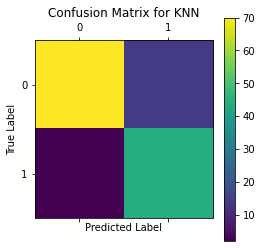

In [50]:
print(knn_confusionmatrix)
plt.matshow(knn_confusionmatrix)
plt.title("Confusion Matrix for KNN")
plt.colorbar()
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

# GridSeach - Model

In [51]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 25))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')

# Fit the Model


In [52]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(metric='manhattan'),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24]},
             scoring='accuracy')

In [53]:
print(grid.best_params_)

{'n_neighbors': 2}


# Predicting Model

In [54]:
# Make predictions with the hypertuned model
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']][: 5]


,mean_test_score,std_test_score,params
0,0.910256,0.021453,{'n_neighbors': 1}
1,0.910256,0.019861,{'n_neighbors': 2}
2,0.889744,0.033036,{'n_neighbors': 3}
3,0.897436,0.018131,{'n_neighbors': 4}
4,0.866667,0.026399,{'n_neighbors': 5}


In [55]:
 print('Test Accuracy: %.3f' % grid.score(X_test, y_test))

Test Accuracy: 0.923


In [56]:
print('Train Accuracy: %.3f' % grid.score(X_train, y_train))

Train Accuracy: 0.977


Text(0, 0.5, 'Cross validated Accuracy')

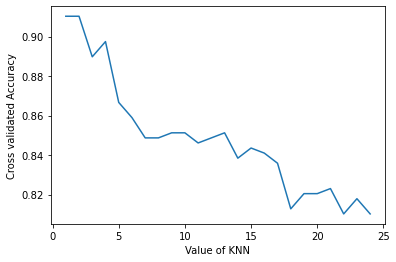

In [57]:
plt.plot(k_range, grid.cv_results_['mean_test_score'])
plt.xlabel('Value of KNN')
plt.ylabel('Cross validated Accuracy')

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction,
                            target_names=["Positive", "Negative"]))

              precision    recall  f1-score   support

    Positive       0.97      0.83      0.90        84
    Negative       0.76      0.96      0.85        46

    accuracy                           0.88       130
   macro avg       0.87      0.89      0.87       130
weighted avg       0.90      0.88      0.88       130

